In [1]:
# pip list

In [12]:
import tensorflow as tf
import os

In [13]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [14]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [15]:
len(gpus)

1

In [16]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, true)

In [17]:
# LOAD DATA USING KERAS UTILS

In [18]:
import tensorflow as tf
import os
import cv2
import imghdr

In [92]:
data_dir = 'data'

In [93]:
os.listdir(os.path.join(data_dir))

['Flower', 'Weed']

In [94]:
tf.data.Dataset??

In [95]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
tf.keras.utils.image_dataset_from_directory??

In [97]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1361 files belonging to 2 classes.


In [98]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [99]:
data_iterator = data.as_numpy_iterator()

In [100]:
data_iterator

In [101]:
batch = data_iterator.next()

In [102]:
len(batch)

2

In [115]:
batch[0].shape

(32, 256, 256, 3)

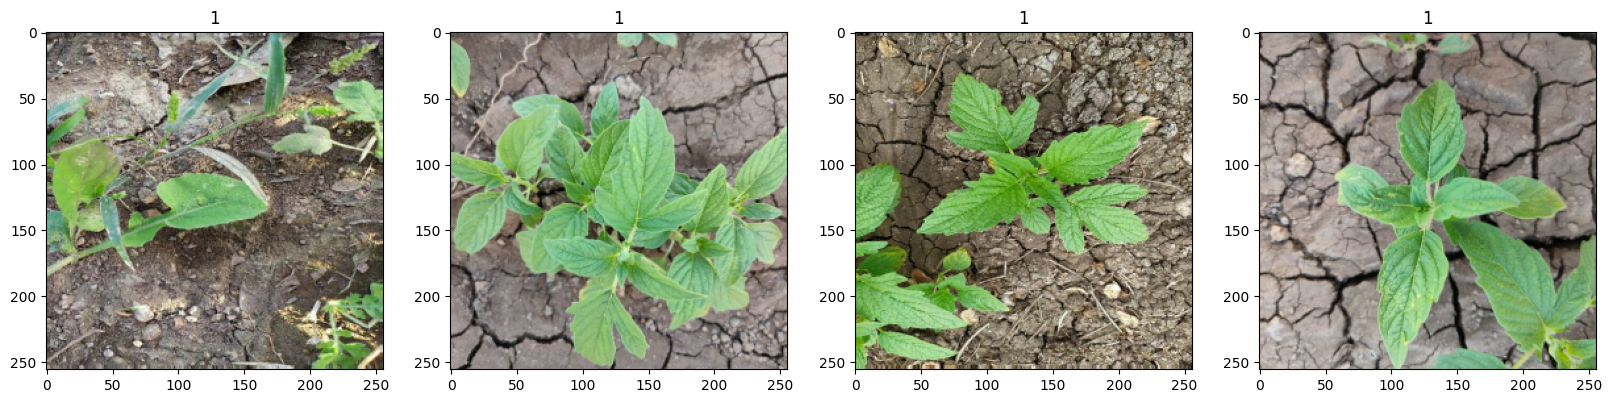

In [116]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# PREPROCESSING DATA

In [37]:
data = data.map(lambda x,y: (x/255,y))

In [38]:
data.as_numpy_iterator().next()

(array([[[[0.5       , 0.44117647, 0.36666667],
          [0.5009804 , 0.44215685, 0.36764705],
          [0.6284314 , 0.56960785, 0.49509802],
          ...,
          [0.59117645, 0.52843136, 0.46960783],
          [0.25490198, 0.19215687, 0.13333334],
          [0.27058825, 0.20784314, 0.14901961]],
 
         [[0.42941177, 0.37058824, 0.29607844],
          [0.5235294 , 0.46470588, 0.39019608],
          [0.5990196 , 0.54019606, 0.46568626],
          ...,
          [0.6490196 , 0.5862745 , 0.527451  ],
          [0.40686274, 0.34411764, 0.28529412],
          [0.30588236, 0.24313726, 0.18431373]],
 
         [[0.35392156, 0.29509804, 0.22058824],
          [0.43823528, 0.37941176, 0.30490196],
          [0.5637255 , 0.50490195, 0.43039215],
          ...,
          [0.6911765 , 0.6284314 , 0.5656863 ],
          [0.6392157 , 0.5764706 , 0.5137255 ],
          [0.622549  , 0.5598039 , 0.4970588 ]],
 
         ...,
 
         [[0.5421569 , 0.47941175, 0.41666666],
          [0.56274

In [39]:
data.as_numpy_iterator().next()[0].max()

1.0

In [40]:
len(data)

43

In [41]:
train_size = int(len(data)*.7)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [42]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [43]:
# BUILD DEEP LEARNING MODEL

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [45]:
model = Sequential()

In [46]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [47]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [49]:
# TRAIN

In [132]:
logdir = 'logs'

In [133]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [135]:
hist = model.fit(train, epochs=3, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/3
31/31 [==============================] - 52s 2s/step - loss: 3.3109e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 2/3
31/31 [==============================] - 51s 2s/step - loss: 9.2050e-05 - accuracy: 1.0000 - val_loss: 6.4485e-05 - val_accuracy: 1.0000
Epoch 3/3
31/31 [==============================] - 51s 2s/step - loss: 5.1491e-05 - accuracy: 1.0000 - val_loss: 8.2750e-04 - val_accuracy: 1.0000


In [ ]:
# Plotting Graph for loss and accuracy

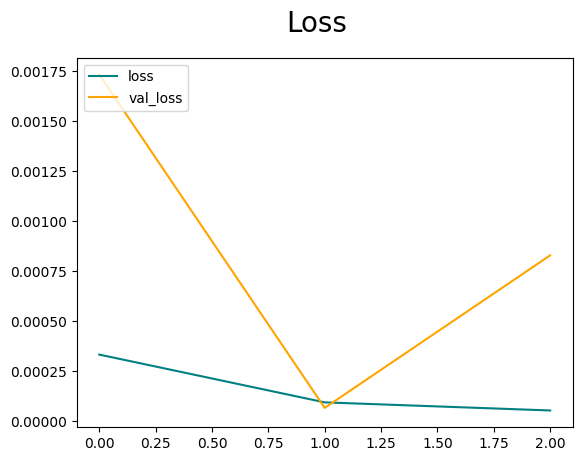

In [136]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

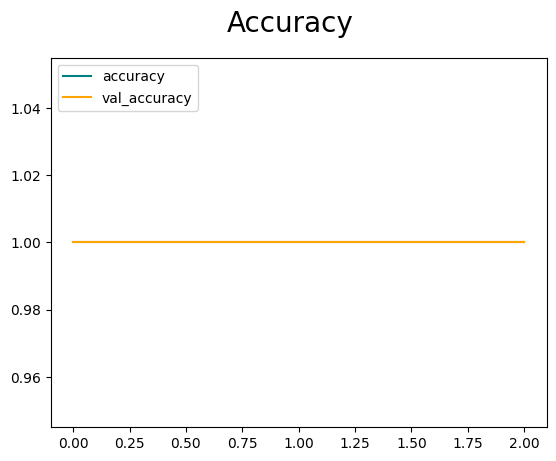

In [137]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [57]:
# PERFORMANCE

In [58]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [59]:
precision = Precision()
recall = Recall()
acc = BinaryAccuracy()

In [60]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)    
    acc.update_state(y, yhat)    

1/1 [==============================] - 0s 410ms/step


In [61]:
print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


In [62]:
# TEST

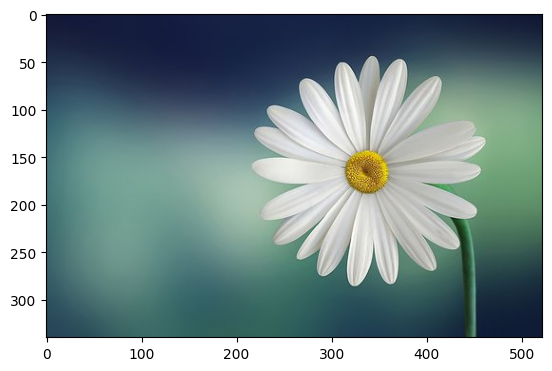

In [124]:
import cv2
img = cv2.imread('Testing/flower.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

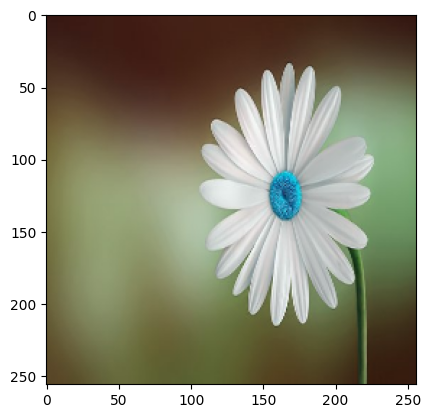

In [125]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [126]:
np.expand_dims(resize, 0)

array([[[[54.       , 24.       , 19.       ],
         [54.       , 24.       , 19.       ],
         [54.       , 24.       , 19.       ],
         ...,
         [51.098053 , 22.098053 , 15.098053 ],
         [51.       , 22.       , 15.       ],
         [51.       , 22.       , 15.       ]],

        [[54.       , 24.       , 19.       ],
         [54.       , 24.       , 19.       ],
         [54.       , 24.       , 19.       ],
         ...,
         [51.795685 , 22.795685 , 15.795685 ],
         [51.492188 , 22.492188 , 15.4921875],
         [51.492188 , 22.492188 , 15.4921875]],

        [[54.820312 , 24.820312 , 19.820312 ],
         [54.820312 , 24.820312 , 19.820312 ],
         [54.820312 , 24.820312 , 19.820312 ],
         ...,
         [52.       , 23.       , 16.       ],
         [52.       , 23.       , 16.       ],
         [52.       , 23.       , 16.       ]],

        ...,

        [[88.       , 70.       , 39.       ],
         [87.       , 69.       , 38.       ]

In [127]:
resize.shape

TensorShape([256, 256, 3])

In [128]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 94ms/step


In [129]:
yhat

array([[0.00035351]], dtype=float32)

In [130]:
if yhat > 0.5:
    print(f'Predicted class is Weed')
else:
    print(f'Predicted class is flower')    

Predicted class is flower


In [79]:
# SAVE THE MODEL

In [80]:
from tensorflow.keras.models import load_model

In [82]:
model.save(os.path.join('Model','Weed_and_flower_Detection'))

INFO:tensorflow:Assets written to: Model\Weed_and_flower_Detection\assets


INFO:tensorflow:Assets written to: Model\Weed_and_flower_Detection\assets


In [83]:
new_model = load_model(os.path.join('Model', 'Weed_and_flower_Detection'))

In [84]:
new_model

In [85]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 249ms/step


In [86]:
yhat_new

array([[0.00035351]], dtype=float32)

In [88]:
if yhat_new > 0.5:
    print(f'Predicted class is Weed')
else:
    print(f'Predicted class is Flower')    

Predicted class is Flower
